In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rand 
from numba import jit, objmode
from scipy.stats import geom, expon 


In [2]:
@jit
def hat_numbers(n):
    hat = list(range(1,n+1))
    l = len(hat)
    #print(hat)
    while l > 1:
        x_index = int(l*rand.random())
        y_index = int(l*rand.random())
        while y_index == x_index:
            y_index = int(l*rand.random())
        x,y = hat[x_index],hat[y_index]
        z = np.abs(x-y)
        #print(f'x,y = {x},{y}')
        #print(f'z = {z}')
        hat.remove(x)
        hat.remove(y)
        hat.append(z)
        #print(hat)
        l = len(hat)
        #print(l)
    return hat[0]
    

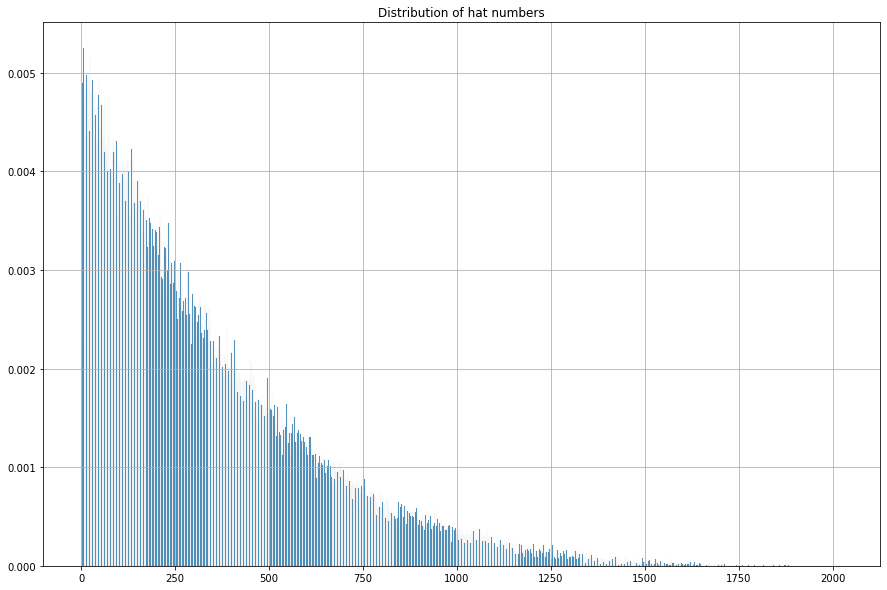

In [3]:
trials = int(1e5)
n0 = 2024
final_number = []

for i in range(trials):
    x = hat_numbers(n0)
    final_number.append(x)
    #if i % 1000 == 0:
        #print(f'{i} samples done')

bins_2024 = np.arange(0,2026) - 0.5
fig,ax = plt.subplots(1,1,figsize = (15,10))
sns.histplot(final_number, bins=bins_2024, stat = 'density', ax=ax)
ax.set_title(f'Distribution of hat numbers') 
x2 = np.linspace(min(final_number), max(final_number))
ax.set_ylabel('')

ax.grid('on')

plt.show()


In [4]:
data_2024 = final_number


The probability of correctly guessing is greater than a half if x <=  255.0
260


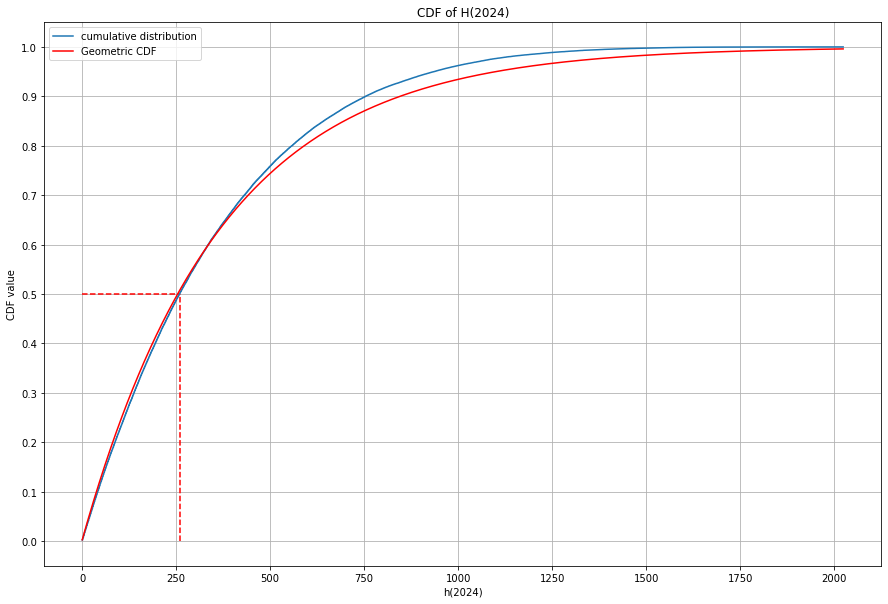

In [5]:
bins = np.arange(0,2026)-0.5
hist_data,edges = np.histogram(data_2024, bins= bins, density=True)
#print(hist_data)
cdf = []
count = 0
for data in hist_data:
    count += data
    cdf.append(count)

fig_cdf,ax_cdf = plt.subplots(1,1,figsize = (15,10))
ax_cdf.plot(np.arange(0,2025), cdf, label = 'cumulative distribution')

ax_cdf.grid('on')
ax_cdf.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

half = np.where(np.array(cdf)>= 0.5)[0][0]
ax_cdf.vlines(half, 0, 0.5, colors = 'red', linestyles='dashed')
ax_cdf.hlines(0.5, 0,half, colors = 'red', linestyles='dashed')

ax_cdf.set_xlabel('h(2024)')
ax_cdf.set_ylabel('CDF value')
ax_cdf.set_title('CDF of H(2024)')

x_cdf = np.arange(0,2025)
y_cdf = geom.cdf(x_cdf+1,5.5/(2024))
ax_cdf.plot(x_cdf,y_cdf,'r', label = 'Geometric CDF')

print('The probability of correctly guessing is greater than a half if x <= ', geom.ppf(0.5, 5.5/(2024)))
print(half)

plt.legend()

plt.show()

#actual_data,bin_edges = np.histogram(data_2024, bins = bins)
#for i in range(20):
    #if i == 0:
    #    ratio = hist_data[2*i]/hist_data[2*i+2]
    #else:
    #    ratio = hist_data[2*i+2]/hist_data[2*i]
    #print(ratio)


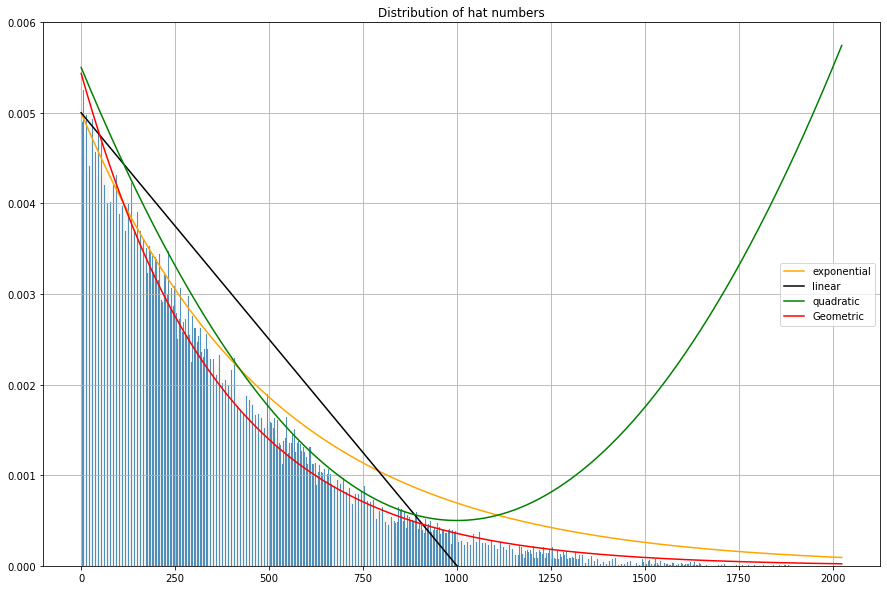

In [6]:


fig,ax = plt.subplots(1,1,figsize = (15,10))
sns.histplot(data_2024, bins=bins, stat = 'density', ax=ax)
ax.set_title(f'Distribution of hat numbers') 
ax.set_ylabel('')

ax.grid('on')

x = np.arange(0, n0+1)

y1 = 0.005* np.exp(-4*x/n0)
ax.plot(x,y1,color='orange',label = 'exponential')

y2 = 0.005 - (5e-6)*x
ax.plot(x,y2,'k',label = 'linear')

#x3 = np.arange(1, n0+1)
y3 = (5e-9)*(x-1000)**2 + 0.0005
ax.plot(x,y3,'g', label = 'quadratic')

#x4 = np.arange(1, n_test+1)
y4 = 2*geom.pmf(x+1,5.5/(n0))
ax.plot(x,y4,'r', label = 'Geometric')

ax.set_ylim(0, 0.006)

plt.legend()

plt.show()


## Review ##

In [22]:
bins2024 = np.arange(0,2026)-0.5
hist_data_2024,_ = np.histogram(data_2024, bins = bins2024)
#print(hist_data_2024)

big = np.argmax(hist_data_2024)
truth = (big == 2)
print(f'The most likely event is h(2024) = {big}')
print(f'This means the conjecture that the most likely event is h(2024)=2 is {truth}')
if not truth:
    print(f'The number of events of h(2024) = 2 is {hist_data_2024[2]}, whereas the number of events of h(2024) = {big} is {hist_data_2024[big]}')

print()
print(f'The number of events of h(2024) = 2024 is {hist_data_2024[2024]}')

print()
print(f'The ratio between h(2024)=0 and h(2024)=2 is {hist_data_2024[0]/hist_data_2024[2]}')

The most likely event is h(2024) = 6
This means the conjecture that the most likely event is h(2024)=2 is False
The number of events of h(2024) = 2 is 504, whereas the number of events of h(2024) = 6 is 525

The number of events of h(2024) = 2024 is 0

The ratio between h(2024)=0 and h(2024)=2 is 0.4503968253968254
